<a href="https://colab.research.google.com/github/crissstar/projectmanager/blob/main/2_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_03_%EA%B3%B5%EA%B3%B5%EB%8D%B0%EC%9D%B4%ED%84%B0_%EA%B8%B0%EC%83%81%EC%B2%AD%EB%82%A0%EC%94%A8_%EB%B0%B0%ED%8F%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter4: 데이터 분석

## 3. 공공데이터를 이용한 EDA 분석

## 02- 기상청 데이터 분석

---

## 기상청 데이터 분석(종관데이터)

### #파이썬으로 데이터 분석하는 순서
 [사전준비] 필요한 파이썬 라이브러리 설치하기
 [사전준비] 데이터 준비하기 : 웹 사이트에서 공공데이터 다운로드하기
 1. 데이터 불러오기 : 파이썬으로 데이터 읽어서 표로 나타내기
 2. 데이터 전처리하기 : 필요한 데이터만 추출하기
 3. 데이터 시각화하기 : 데이터 그래프로 나타내기
 4. 데이터 저장하기 :  파일로 저장하기

---

### #라이브러리 설치 확인하기
아래 코드를 실행한 후 오류 메시지가 없으면 성공적으로 설치된 것입니다.

In [1]:
import pandas  as pd
pd.__version__

'1.5.3'

In [2]:
import numpy as np
np.__version__

'1.23.5'

In [3]:
import matplotlib as plt
plt.__version__

'3.7.1'

---

### 1.데이터 다운로드하기

- 기상청 사이트에서 날씨 데이터를 다운로드한다.
- 사이트에 가입하고 로그인해야 다운로드할 수 있다.
- https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36
- csv파일 다운로드해서 사용
- OBS_ASOS_MNH_~.csv 파일 이름을 'weather_data.csv'로 변경해서 사용하기


---------

### 2. 데이터 불러오기 : 파이썬으로 데이터 읽어서 표로 나타내기

In [67]:
import pandas as pd
import numpy as np
import matplotlib as plt


# OBS_ASOS_MNH_~.csv 파일명 데이터를 'weather_data.csv'로 변경하기
file = './sample_data/weather_data.csv'
file = './sample_data/OBS_ASOS_MNH_20230830103358.csv'
df = pd.read_csv(file, encoding='CP949')

print(type(df))
df.head(2)

<class 'pandas.core.frame.DataFrame'>


,지점,지점명,일시,평균기온(°C),최고기온(°C),최저기온(°C),평균현지기압(hPa),평균상대습도(%),월합강수량(00~24h만)(mm),평균풍속(m/s),합계 일조시간(hr),최심적설(cm)
0,90,속초,1968-01,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8


In [68]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

---

### 2.데이터 전처리(가공하기)
- 함수 참고:  https://pandas.pydata.org/docs/reference/index.html

#### # 데이터 요약

In [69]:
# 데이터 요약 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56339 entries, 0 to 56338
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   지점                  56339 non-null  int64  
 1   지점명                 56339 non-null  object 
 2   일시                  56339 non-null  object 
 3   평균기온(°C)            55710 non-null  float64
 4   최고기온(°C)            56141 non-null  float64
 5   최저기온(°C)            56116 non-null  float64
 6   평균현지기압(hPa)         53900 non-null  float64
 7   평균상대습도(%)           55143 non-null  float64
 8   월합강수량(00~24h만)(mm)  56046 non-null  float64
 9   평균풍속(m/s)           55180 non-null  float64
 10  합계 일조시간(hr)         54959 non-null  float64
 11  최심적설(cm)            11976 non-null  float64
dtypes: float64(9), int64(1), object(2)
memory usage: 5.2+ MB


#### # 기술통계 정보

In [70]:
df.describe()

,지점,평균기온(°C),최고기온(°C),최저기온(°C),평균현지기압(hPa),평균상대습도(%),월합강수량(00~24h만)(mm),평균풍속(m/s),합계 일조시간(hr),최심적설(cm)
count,56339.000000,55710.000000,56141.000000,56116.000000,53900.000000,55143.000000,56046.000000,55180.000000,54959.000000,11976.000000
mean,187.030015,12.669438,24.362076,2.060177,1005.758800,69.842120,110.705444,2.317180,188.857523,8.185429
std,62.186396,9.172617,8.036760,10.787217,16.173635,9.908112,121.587388,1.287332,46.139353,14.841091
min,90.000000,-13.500000,-4.800000,-32.600000,911.800000,8.000000,0.000000,-0.400000,0.000000,0.000000
25%,135.000000,4.600000,17.900000,-6.500000,1001.100000,63.000000,30.500000,1.400000,159.000000,1.500000
50%,174.000000,13.200000,25.900000,1.300000,1008.550000,71.000000,68.200000,2.000000,189.300000,4.300000
75%,245.000000,20.900000,31.200000,11.500000,1015.900000,77.000000,146.675000,2.900000,219.300000,9.000000
max,295.000000,30.200000,41.000000,24.800000,1029.700000,99.000000,1364.200000,22.700000,1300.300000,293.600000


#### # 결측데이터 시각화
missingno패키지는 pandas 데이터프레임 데이터에서 누락된 데이터를 찾고 시각화하는 기능 제공

In [71]:
!pip install missingno

- **행에 결측 데이터 시각화**

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

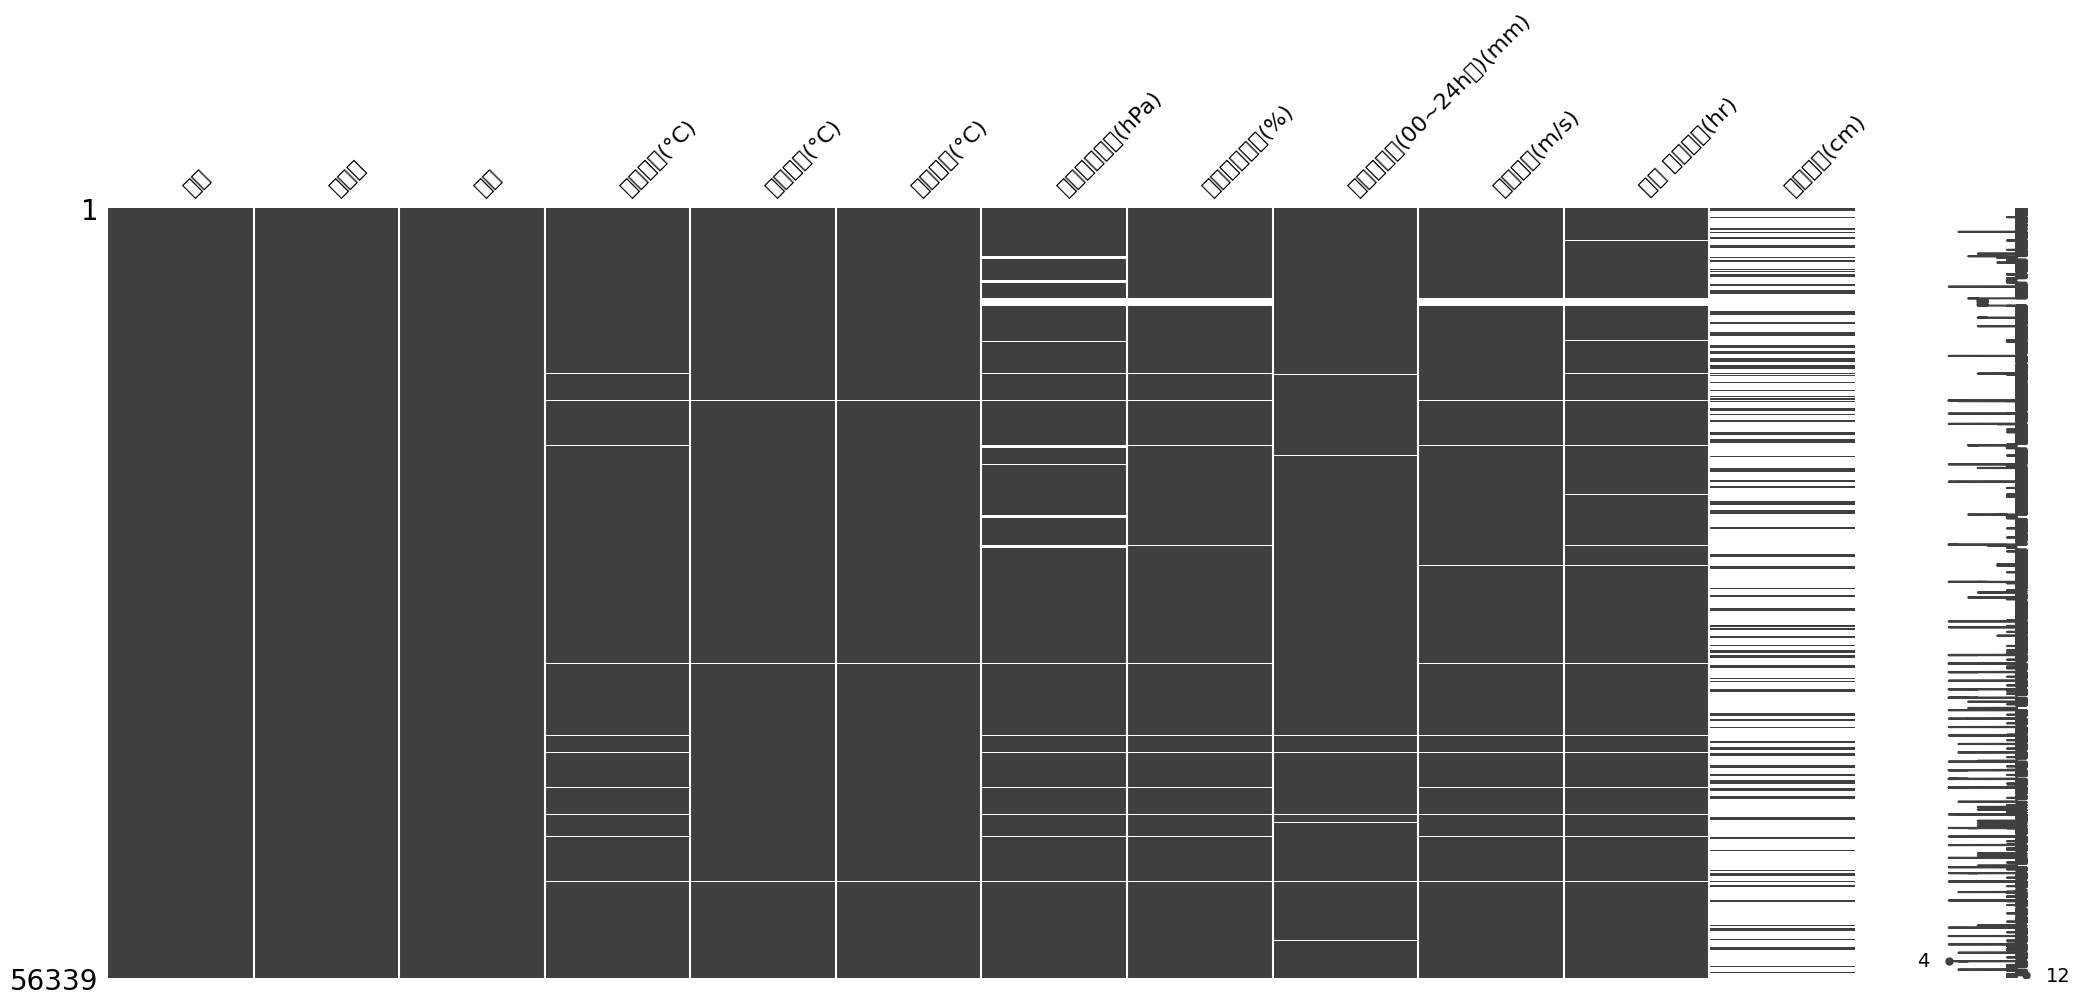

In [72]:
import missingno as msno
import matplotlib.pyplot as plt
# plt.rc('font', family='NanumGothic') # 윈도우용 폰트-코랩용은 해당폰트 지정

msno.matrix(df)
plt.show()

- **열에 결측 데이터 시각화**

In [ ]:
msno.bar(df)
plt.show()

---

#### 2. 컬럼명 변경하기

In [12]:
df.columns
df.columns = ['지점', '지점명', '일시', '평균기온', '최고기온', '최저기온', '평균현지기압',
       '평균상대습도', '월합강수량', '평균풍속','일조시간', '최심적설']
df.head(3)

,지점,지점명,일시,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1968-01,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8
2,90,속초,1968-03,5.9,20.5,-3.2,1016.1,57.0,8.8,2.1,223.7,0.0


#### 3. 컬럼 추가하기
DataFrame.insert(추가하고싶은위치,컬럼명,값, allow_duplicate=False)

In [73]:
df.insert(3,'검색일자',df['일시'])
df

,지점,지점명,일시,검색일자,평균기온(°C),최고기온(°C),최저기온(°C),평균현지기압(hPa),평균상대습도(%),월합강수량(00~24h만)(mm),평균풍속(m/s),합계 일조시간(hr),최심적설(cm)
0,90,속초,1968-01,1968-01,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,1968-02,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8
2,90,속초,1968-03,1968-03,5.9,20.5,-3.2,1016.1,57.0,8.8,2.1,223.7,0.0
3,90,속초,1968-04,1968-04,10.5,21.4,4.0,1019.4,63.0,6.9,2.0,255.7,NaN
4,90,속초,1968-05,1968-05,14.6,24.5,9.3,1011.7,74.0,49.1,2.2,187.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56334,295,남해,2023-04,2023-04,14.3,26.6,3.8,1009.8,65.0,144.7,1.8,194.0,NaN
56335,295,남해,2023-05,2023-05,18.0,29.1,7.9,1008.2,75.0,415.5,1.4,186.0,NaN
56336,295,남해,2023-06,2023-06,22.5,30.6,15.8,1002.4,78.0,364.9,1.2,192.6,NaN
56337,295,남해,2023-07,2023-07,25.4,33.5,20.2,1003.5,88.0,709.8,1.1,99.8,NaN


In [74]:
df.insert(3,'검색일자',df['일시'])
df

ValueError: ignored

In [75]:
df

,지점,지점명,일시,검색일자,평균기온(°C),최고기온(°C),최저기온(°C),평균현지기압(hPa),평균상대습도(%),월합강수량(00~24h만)(mm),평균풍속(m/s),합계 일조시간(hr),최심적설(cm)
0,90,속초,1968-01,1968-01,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,1968-02,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8
2,90,속초,1968-03,1968-03,5.9,20.5,-3.2,1016.1,57.0,8.8,2.1,223.7,0.0
3,90,속초,1968-04,1968-04,10.5,21.4,4.0,1019.4,63.0,6.9,2.0,255.7,NaN
4,90,속초,1968-05,1968-05,14.6,24.5,9.3,1011.7,74.0,49.1,2.2,187.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56334,295,남해,2023-04,2023-04,14.3,26.6,3.8,1009.8,65.0,144.7,1.8,194.0,NaN
56335,295,남해,2023-05,2023-05,18.0,29.1,7.9,1008.2,75.0,415.5,1.4,186.0,NaN
56336,295,남해,2023-06,2023-06,22.5,30.6,15.8,1002.4,78.0,364.9,1.2,192.6,NaN
56337,295,남해,2023-07,2023-07,25.4,33.5,20.2,1003.5,88.0,709.8,1.1,99.8,NaN


In [ ]:
df.head(3)

- **문자열에서 특정 문자 제거**: '검색일자' 값중에 '년도-월-일' 형태로 되어 있는 구조에서  '-'기호를 제거

In [18]:
df['검색일자']= df['일시'].str.replace(pat=r'-',repl=r'',regex=True)
df.head(2)

,지점,지점명,일시,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설,검색일자
0,90,속초,1968-01,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN,196801
1,90,속초,1968-02,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8,196802


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55955 entries, 0 to 55954
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지점      55955 non-null  int64  
 1   지점명     55955 non-null  object 
 2   일시      55955 non-null  object 
 3   평균기온    55327 non-null  float64
 4   최고기온    55757 non-null  float64
 5   최저기온    55732 non-null  float64
 6   평균현지기압  53517 non-null  float64
 7   평균상대습도  54760 non-null  float64
 8   월합강수량   55662 non-null  float64
 9   평균풍속    54799 non-null  float64
 10  일조시간    54575 non-null  float64
 11  최심적설    11976 non-null  float64
 12  검색일자    55955 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 5.5+ MB


- **데이터형 변환하기**: str(object)-->int64 형으로 변환하기

In [20]:
df['검색일자'] = df['검색일자'].apply('int64')
df.dtypes

지점          int64
지점명        object
일시         object
평균기온      float64
최고기온      float64
최저기온      float64
평균현지기압    float64
평균상대습도    float64
월합강수량     float64
평균풍속      float64
일조시간      float64
최심적설      float64
검색일자        int64
dtype: object

- **데이터형 변환하기**: int64 --> str(object)형으로 변환하기

In [21]:
df['검색일자'] = df['검색일자'].apply(str)
df.dtypes

지점          int64
지점명        object
일시         object
평균기온      float64
최고기온      float64
최저기온      float64
평균현지기압    float64
평균상대습도    float64
월합강수량     float64
평균풍속      float64
일조시간      float64
최심적설      float64
검색일자       object
dtype: object

In [22]:
# 년월 추가
df.insert(3,'년도',df['일시'].str[0:4])
df

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설,검색일자
0,90,속초,1968-01,1968,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN,196801
1,90,속초,1968-02,1968,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8,196802
2,90,속초,1968-03,1968,5.9,20.5,-3.2,1016.1,57.0,8.8,2.1,223.7,0.0,196803
3,90,속초,1968-04,1968,10.5,21.4,4.0,1019.4,63.0,6.9,2.0,255.7,NaN,196804
4,90,속초,1968-05,1968,14.6,24.5,9.3,1011.7,74.0,49.1,2.2,187.8,NaN,196805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55950,295,남해,2022-12,2022,2.5,11.8,-6.7,1018.2,58.0,7.8,1.6,187.6,NaN,202212
55951,295,남해,2023-01,2023,2.8,19.9,-11.7,1018.1,59.0,108.5,1.6,204.7,NaN,202301
55952,295,남해,2023-02,2023,5.2,15.0,-3.7,1019.0,58.0,34.5,1.3,174.5,NaN,202302
55953,295,남해,2023-03,2023,11.1,24.1,-1.7,1014.6,61.0,62.4,1.3,217.0,NaN,202303


#### 4. 컬럼 삭제

In [17]:
# df.drop(['신규','신규2'], axis=1, inplace=True)
df.drop('신규2', axis=1, inplace=True)
df.drop('신규3', axis=1, inplace=True)
df.drop('검색일자', axis=1, inplace=True)
df.head(3)

,지점,지점명,일시,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1968-01,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8
2,90,속초,1968-03,5.9,20.5,-3.2,1016.1,57.0,8.8,2.1,223.7,0.0


#### 5. 특정 조건 검색

In [23]:
print( '#지점명 개수: ', len( set(df['지점명']) ) )
print( '#지점명: ', set( df['지점명'] ) )

#지점명 개수:  102
#지점명:  {'주암', '보령', '삼척', '정선군', '강화', '장수', '대전', '함양군', '진주', '봉화', '고창', '문경', '추풍령', '부여', '상주', '포항', '영덕', '창원', '군산', '통영', '경주시', '산청', '흑산도', '장흥', '영광군', '백령도', '파주', '홍천', '북강릉', '남원', '여수', '대관령', '김해시', '순천', '구미', '전주', '태백', '무안', '수원', '관악산', '진도군', '제천', '목포', '거제', '울진', '안동', '진도(첨찰산)', '광주', '세종', '부산', '서귀포', '고창군', '금산', '철원', '순창군', '보은', '부안', '양평', '영월', '고산', '영주', '서산', '거창', '의령군', '북창원', '원주', '강진군', '울릉도', '고흥', '성산', '성산포', '영천', '속초', '해남', '남해', '보성군', '합천', '천안', '임실', '인제', '완도', '청주', '양산시', '광양시', '대구', '홍성', '인천', '정읍', '동두천', '북춘천', '춘천', '이천', '의성', '충주', '울산', '제주', '밀양', '동해', '강릉', '대구(기)', '청송군', '서울'}


In [26]:
# 특정년도 데이터
df_2023 = df.query(" 년도 == '2023' ")
# df_2023 = df[ df['년도']=='2023' ]
df_2023.head(2)

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설,검색일자
660,90,속초,2023-01,2023,0.2,15.1,-16.0,1019.9,45.0,94.7,2.0,215.7,NaN,202301
661,90,속초,2023-02,2023,2.7,15.6,-6.4,1022.3,53.0,43.4,1.9,186.6,NaN,202302


In [28]:
print( '#지점명 개수: ', len( set(df_2023['지점명']) ) )
print( '#지점명: ', set( df_2023['지점명'] ) )
#print( '#지점명 개수: ', len( set(df[df['년도']=='2023' ][지점명']) ) )   어디가 틀린지 모르겠

SyntaxError: ignored

In [30]:
# 년도=='2023'이면서 전라북도 관측소 데이터만 추출하기
df.query("년도 == '2023' and 지점명 in ('고창','고창군','전주','정읍','장수') ")
df_2023.query(" 지점명 in ('고창','고창군','전주','정읍','장수')").head(2)

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설,검색일자
19898,146,전주,2023-01,2023,0.8,17.0,-15.0,1017.5,64.0,26.8,1.8,199.8,1.0,202301
19899,146,전주,2023-02,2023,3.0,14.9,-5.7,1018.3,62.0,9.6,1.5,179.5,0.4,202302


- **특정 컬럼명 검색** : 지점명=='제주' 데이터

In [31]:
df[df.지점명 == '제주' ]
df[df['지점명'] == '제주' ]

# df.query(" 지점명 == '제주' ")

# df.iloc[ df.index[ df['지점명'] == '제주' ] ]

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설,검색일자
28444,184,제주,1923-05,1923,16.5,27.0,8.3,NaN,82.0,70.7,5.2,200.4,NaN,192305
28445,184,제주,1923-06,1923,19.7,31.2,10.4,NaN,82.0,385.3,5.1,227.3,NaN,192306
28446,184,제주,1923-07,1923,23.6,33.0,17.1,NaN,86.0,359.5,5.9,218.8,NaN,192307
28447,184,제주,1923-08,1923,26.7,34.6,20.2,NaN,77.0,92.2,6.6,301.7,NaN,192308
28448,184,제주,1923-09,1923,22.1,30.4,13.4,NaN,78.0,145.0,7.0,224.4,NaN,192309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29639,184,제주,2022-12,2022,6.9,14.6,-0.4,1022.7,66.0,35.3,4.5,48.7,2.7,202212
29640,184,제주,2023-01,2023,6.8,20.7,-3.4,1022.5,68.0,42.1,4.0,86.7,3.7,202301
29641,184,제주,2023-02,2023,7.7,16.4,1.1,1023.0,71.0,89.6,3.1,117.2,NaN,202302
29642,184,제주,2023-03,2023,12.3,22.4,2.4,1018.5,66.0,49.6,2.7,211.1,NaN,202303


- **또는(|) , 포함(in)** 조건 사용: 강릉 또는 속초 데이터 추출

In [ ]:
# 또는(|) 사용
df.query(" 지점명=='제주' | 지점명=='서귀포' ")
df.head()

# df.query(" 지점명=='제주' | 지점명=='서귀포' ").head()

# df.query(" 지점명 in ('제주','서귀포') ").head(2) 또는 보다는 in을 사용하는 것이 효과적

- **그리고(&)** 조건 사용

In [32]:
df[ (df.지점명 == '제주' ) & (df.최고기온 >35) ].tail(2)

# df.query(" 지점명=='제주' & 최저기온 <= 0 ")

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설,검색일자
29634,184,제주,2022-07,2022,28.4,36.0,23.2,1003.8,80.0,149.0,3.1,230.6,NaN,202207
29635,184,제주,2022-08,2022,29.2,37.5,21.2,1005.8,75.0,124.3,3.1,232.4,NaN,202208


### [실습문제] 관측 지점이 제주도인 데이터 검색

In [ ]:
# 포함(in) 사용
df.query(" 지점명 in ('고산','서귀포','성산','성산포','제주') ")

- **min()** : 최초 측정월, 마지막 측정월

In [33]:
# 측정월 최소, 최대
print ( '최초 측정일시: ', min(df['일시']) )
print ( '최초 측정일시: ', df['일시'].min() )
print ( '최근 측정일시: ', max(df['일시']) )
print ( '최근 측정일시: ', df['일시'].max() )

# 측정 최초월('1904-04')의 데이터
# df['일시'].min()
# df.query(" 일시 == '1904-04-01'")

df.query(f" 일시 == '{ df['일시'].min() }' ")
df[ df['일시'] == df['일시'].min() ]

최초 측정일시:  1904-04
최초 측정일시:  1904-04
최근 측정일시:  2023-04
최근 측정일시:  2023-04


,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설,검색일자
6561,112,인천,1904-04,1904,NaN,19.2,6.4,NaN,NaN,104.9,NaN,NaN,NaN,190404
22303,159,부산,1904-04,1904,NaN,21.4,4.7,NaN,NaN,172.9,NaN,NaN,NaN,190404
24488,165,목포,1904-04,1904,NaN,20.2,NaN,NaN,NaN,34.7,NaN,NaN,NaN,190404


In [ ]:
# 전주 최초 측정일
df_junjoo = df.query(f" 지점명 == '전주' ")
df_junjoo['일시'].min()

- **max()** : 최근 측정 월 검색

In [34]:
df.query(f" 일시 == '{ df['일시'].max() }' ")

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설,검색일자
663,90,속초,2023-04,2023,12.6,26.9,4.0,1011.6,61.0,57.0,2.2,212.2,NaN,202304
742,93,북춘천,2023-04,2023,12.1,27.8,-2.2,1003.6,65.0,95.7,1.6,208.2,NaN,202304
1166,95,철원,2023-04,2023,11.7,27.0,-1.6,996.5,64.0,97.5,1.6,213.9,NaN,202304
1470,98,동두천,2023-04,2023,12.7,28.7,-0.7,1001.1,59.0,94.6,1.5,198.9,NaN,202304
1726,99,파주,2023-04,2023,11.8,27.2,-1.3,1011.8,68.0,102.3,1.7,185.5,NaN,202304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53509,285,합천,2023-04,2023,14.0,28.8,-0.4,1011.6,60.0,44.6,1.2,198.4,NaN,202304
54114,288,밀양,2023-04,2023,14.5,29.7,0.7,1013.8,57.0,52.5,1.3,209.9,NaN,202304
54726,289,산청,2023-04,2023,13.2,29.7,0.1,999.4,64.0,84.2,1.9,198.1,NaN,202304
55339,294,거제,2023-04,2023,14.2,25.3,4.3,1010.2,68.0,136.5,1.8,202.8,NaN,202304


In [ ]:
df.query(f" 지점명 == '전주' & 일시 == '{ df['일시'].min() }' ")

In [ ]:
df.query(f" 지점명 in ('제주','성산','고산','성산포','서귀포') & 일시 == '{ df['일시'].max() }' ")

### [실습]: 가장 더웠던 날짜와 온도는?
- 기상관측 데이터에서 가장 더웠던(추웠던) 해와 기온은?

In [52]:
# 컬럼 추출
df['최고기온'].max()
df.최고기온.max()



# 행 추출
df.query(f" 최고기온 == {  df.최고기온.max()  } ")
df[ df.최고기온 == df.최고기온.max() ]

KeyError: ignored

In [53]:

# 측정 지점이 서울인 것
df_seoul = df[(df.지점명=='관악산')|(df.지점명=='서울')]

# 측정 지점이 서울이면서 최고기온인 행 가져오기
# df_seoul.query(f" 최고기온 == {  df_seoul.최고기온.max()  } ")
df_seoul[ df_seoul.최고기온 == df_seoul.최고기온.max() ]

AttributeError: ignored

In [58]:
# 행 추출 특정 컬럼값(year) 추출
print(f'기상관측 데이터를 통해 가장 더웠던 년도는?')
print(df.query(f" 최고기온 == {  df.최고기온.max()  } ").일시.str[0:4] )


yymm = df.query(f" 최고기온 == {  df.최고기온.max()  } ").일시.str[0:7]
yymm = df[ df.최고기온 == df.최고기온.max() ].일시.str[0:7]
print(f'기상관측 데이터를 통해 가장 더웠던 년-월: {yymm}')


# 행 추출 특정 컬럼값(최고기온) 추출
df.query(f" 최고기온 == {  df.최고기온.max()  } ").최고기온
df[ df.최고기온 == df.최고기온.max() ].최고기온

기상관측 데이터를 통해 가장 더웠던 년도는?


AttributeError: ignored

In [ ]:
# 전체 최고기온
df.query(f" 최고기온 == {df['최고기온'].max()} ")

# 전체 최고기온 일시
df.query(f" 최고기온 == {df['최고기온'].max()} ")['일시'].str[0:4]

# 전체 최고기온 지점명
df.query(f" 최고기온 == {df['최고기온'].max()} ")['지점명']

# # 측정 지점이 제주인  최고기온
df.query(f" 지점명=='제주' ")['최고기온'].max()


# 측정 지점이 제주 전역의   최고기온
df.query(f" 지점명 in ('고산','서귀포','성산','성산포','제주') ")['최고기온'].max()

### [실습]: 가장 추웠던 날짜와 온도는?

In [59]:
field = '최저기온'

# 전체 최저기온
df.query(f" {field} <= { df[field].min() } ")

# 전체 최저기온 일시
df.query(f" {field} <= { df[field].min() } ")['일시'].str[0:4]

# 전체 최저기온 지점명
df.query(f" {field} <= { df[field].min() } ")['지점명']

# 측정 지점이 제주인 최저기온
df.query(f" 지점명=='제주' ")[field].min()

# 측정 지점이 제주 전역의  최고기온
df.query(f" 지점명 in ('고산','서귀포','성산','성산포','제주') ")['최저기온'].min()

KeyError: ignored

###  [실습] : 'OO'에서 가장 더웠던 날짜와 기온?

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packag

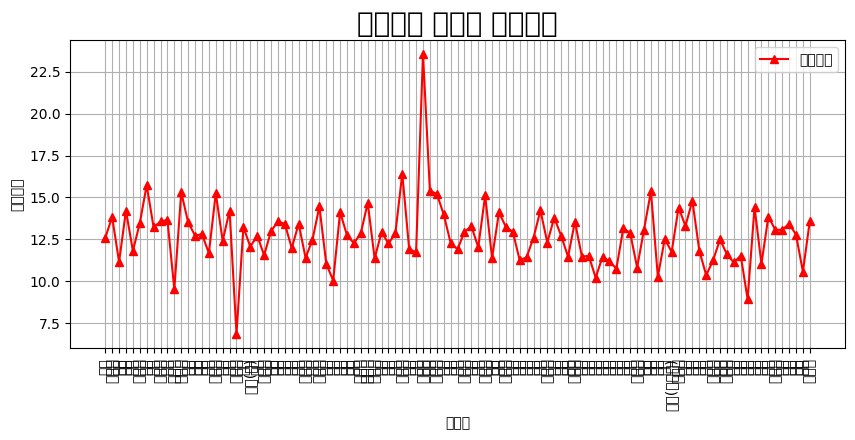

In [76]:

import pandas as pd
import matplotlib.pyplot as plt

# 한글,그래프크기
#plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = (10, 4)
plt.rcParams['axes.unicode_minus']

# 1.데이터 불러오기
file = './sample_data/weather_data.csv'
file = './sample_data/OBS_ASOS_MNH_20230830103358.csv'
df = pd.read_csv(file, encoding='CP949')

# 2.컬럼명 지정
df.columns = ['지점', '지점명', '일시', '평균기온', '최고기온', '최저기온',
              '평균현지기압','평균상대습도', '월합강수량', '평균풍',
              '일조시간','최심적설']
df['년도'] = df.일시.str[0:4]
df.head(2)


# 3.지점별 평균 구하기(지점 30개만 추출)
df_mean = df.groupby('지점명').aggregate({'평균기온':'mean'})

plt.plot(df_mean, '^', linestyle='solid', c='red', label='평균기온')
plt.xticks(rotation=90)
plt.title('종관관측 지점별 평균기온', fontsize=20)
plt.xlabel('지점명'); plt.ylabel('평균기온');
plt.legend(); plt.grid();
plt.show()

###  [실습] : 'OO'에서 가장 추웠던 날짜와 기온은?

--------

### 그룹핑(Grouping)

#### #그룹핑: 지점별  

In [77]:
df.groupby(['지점명'], as_index=False).mean()
df.groupby('지점명').mean()

<ipython-input-77-5011cd9e8b27>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['지점명'], as_index=False).mean()
<ipython-input-77-5011cd9e8b27>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('지점명').mean()


,지점,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍,일조시간,최심적설
지점명,,,,,,,,,,
강릉,105.0,12.595410,25.025356,2.301425,1013.726672,64.021805,112.374005,2.909323,190.172865,17.191809
강진군,259.0,13.836585,25.120482,3.496386,1015.163415,71.993902,120.304819,2.338182,183.706627,7.450000
강화,201.0,11.155921,22.454943,0.182982,1012.320395,70.440789,108.330843,1.743092,202.854950,4.911034
거제,294.0,14.220559,24.379221,4.629221,1012.959539,66.863487,156.448430,1.782401,197.028878,3.147727
거창,284.0,11.812500,25.127715,-0.311831,989.851613,70.003289,105.893148,1.339309,200.093234,5.467901
...,...,...,...,...,...,...,...,...,...,...
합천,285.0,13.069737,26.079934,1.307072,1012.783196,67.942434,107.288614,1.205766,195.558581,3.942857
해남,261.0,13.431579,24.532372,2.576282,1013.487664,74.432566,109.456585,2.104778,194.251320,4.406107
홍성,177.0,12.793617,24.527660,1.650000,1013.593617,75.265957,101.125532,1.523404,204.382979,4.663158


In [ ]:
df.groupby(['지점명'], as_index=False).count()

#### #그룹핑(컬럼1개): 지점별  평균기온

In [62]:
# 방법1
df['평균기온'].groupby(df['지점명']).mean()

KeyError: ignored

In [78]:
# 방법2
df.groupby('지점명')['평균기온'].agg('mean')

지점명
강릉     12.595410
강진군    13.836585
강화     11.155921
거제     14.220559
거창     11.812500
         ...    
합천     13.069737
해남     13.431579
홍성     12.793617
홍천     10.582895
흑산도    13.593750
Name: 평균기온, Length: 103, dtype: float64

In [79]:
# 방법3
df.groupby('지점명')['평균기온'].agg(**{'평균기온':'mean'})

,평균기온
지점명,
강릉,12.595410
강진군,13.836585
강화,11.155921
거제,14.220559
거창,11.812500
...,...
합천,13.069737
해남,13.431579
홍성,12.793617


In [80]:
# 방법4
df.groupby('지점명').aggregate({'평균기온':'mean'})

,평균기온
지점명,
강릉,12.595410
강진군,13.836585
강화,11.155921
거제,14.220559
거창,11.812500
...,...
합천,13.069737
해남,13.431579
홍성,12.793617


In [ ]:
df_temp = df.groupby('지점명').aggregate({'평균기온':'mean'})
df_temp.plot()

#### #그룹핑(컬럼 2개): 지점명+년도별,  평균기온

In [82]:
df.groupby(['지점명','년도'])['평균기온'].agg('mean')
df.groupby(['지점명','년도'])['평균기온'].agg(**{'평균':'mean'})
df.groupby(['지점명','년도']).aggregate({'평균기온':'mean'})
#df.groupby(['지점명','년도'])['평균기온'].agg(**{'평균기온':'mean'}).reset_index()

평균기온
지점명 년도             
강릉  1911        NaN
    1912  11.733333
    1913  11.683333
    1914  13.175000
    1915  12.091667
...             ...
흑산도 2019  14.066667
    2020  14.100000
    2021  15.258333
    2022  13.983333
    2023  14.125000

[4751 rows x 1 columns]

<Axes: xlabel='지점명,년도'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47497 (\N{HANGUL SYLLABLE REUNG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  func(

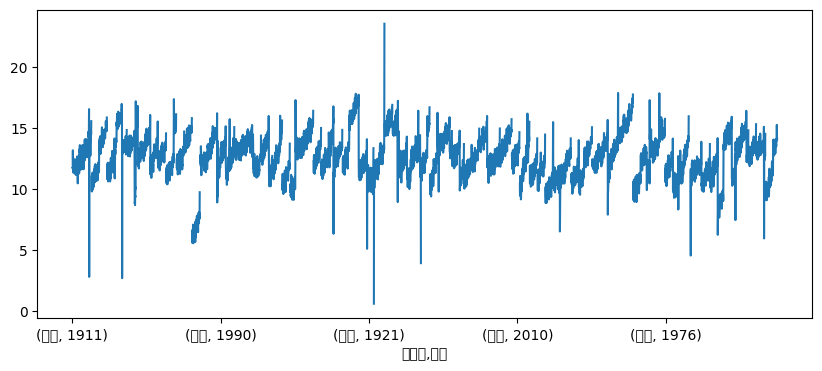

In [85]:
df_temp = df.groupby(['지점명','년도'])['평균기온'].agg('mean')
df_temp.plot()

### [실습문제] : 지점별 최고기온?

- 인텍스를 초기화 하는 방법

In [86]:
# 인텍스를 초기화 하는 방법
df.groupby('지점명')['최고기온'].agg(**{'최고기온':'max'}).reset_index()
df.groupby('지점명').aggregate({'최고기온':'max'}).reset_index()

,지점명,최고기온
0,강릉,39.4
1,강진군,37.4
2,강화,35.8
3,거제,38.6
4,거창,37.8
...,...,...
98,합천,39.5
99,해남,37.2
100,홍성,37.0
101,홍천,41.0


### [실습문제] : 지점별 년도별 최다 월합강수량?

### [실습문제]  OO 지역의 지점별+년도별 최고 최고기온, 최저 최저기온 ,최다 월합강수량, 최다 최심적실은?

#### # DataFrame에서 한 행씩 불러오기
!!![주의]!!! 데이터가 많을 경우 실행하지 않도록

In [88]:
# 한 행씩 불러오기  ---->
for i, row in df_t.iterrows():
     print(i, row)
     print(i, row['지점명'], row['최고기온'])

NameError: ignored

#### 6.가공된 파일 신규 저장하기

In [95]:
# 가공된 데이터 신규 파일로 저장하기
file = 'sample_data/weather_data.csv'
df.to_csv(file, encoding='cp949', mode='w', index=True)

--------------------------

## 3. 데이터 시각화하기

### [실습] : 지점별 평균기온 그래프

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글,그래프크기
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = (10, 4)
plt.rcParams['axes.unicode_minus']

# 1.데이터 불러오기
file = 'sample_data/weather_data.csv'



# 2.컬럼명 지정
df.columns = ['지점', '지점명', '일시', '평균기온', '최고기온', '최저기온',
              '평균현지기압','평균상대습도', '월합강수량', '평균풍',
              '일조시간','최심적설']
df['년도'] = df.일시.str[0:4]
df.head(2)


# 3.지점별 평균 구하기(지점 30개만 추출)
df_mean =

plt.plot(df_mean, '^', linestyle='solid', c='red', label='평균기온')
plt.xticks(rotation=90)
plt.title('종관관측 지점별 평균기온', fontsize=20)
plt.xlabel('지점명'); plt.ylabel('평균기온');
plt.legend(); plt.grid();
plt.show()

SyntaxError: ignored

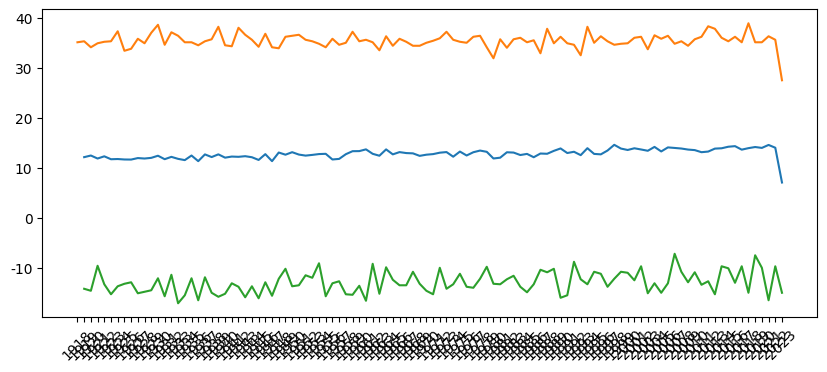

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글,그래프크기
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['figure.figsize'] = (10, 4)
plt.rcParams['axes.unicode_minus'] = False

# 1.데이터 불러오기
file = 'sample_data/weather_data.csv'
df = pd.read_csv(file, encoding='CP949')

# 2.컬럼명 지정
df.columns = ['지점', '지점명', '일시', '평균기온', '최고기온', '최저기온',
              '평균현지기압','평균상대습도', '월합강수량', '평균풍',
              '일조시간','최심적설']
df['년도'] = df.일시.str[0:4]
df.head(2)

# 3.전주지역 데이터만 추출
df_junju =  df.query(" 지점명 == '전주'")
df_junju = df_junju.groupby('년도').aggregate({'평균기온':'mean', '최고기온':'max', '최저기온':'min' })
df_junju

plt.plot(df_junju)
plt.xticks(rotation=45)
plt.show()

### [실습문제] : '제주' 지점의 년도별 평균기온을  선 그래프로 나타내기

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글,그래프크기
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = (10, 4)
plt.rcParams['axes.unicode_minus']

# 1.데이터 불러오기
file = 'data/weather_data2.csv'
df = pd.read_csv(file, encoding='CP949')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df


# 2,지점별 연도별 그룹핑하기
df2 = df.query(" 지점명 == '제주' ")
# df2 = df.query(" 지점명 in ('고산','서귀포','성산','성산포','제주') ")
df2 = df2.groupby(['지점명','년도']).aggregate({'평균기온':'mean'}).reset_index()

X = df2.년도
Y = df2.평균기온

# 3.지점별 평균 구하기(지점 30개만 추출)
plt.plot(X, Y, '^', linestyle='solid', c='r', label='평균기온')
plt.title('제주 지점별 평균기온', fontsize=20)
plt.xlabel('년도')
plt.ylabel('평균기온')
plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.show()

FileNotFoundError: ignored

### [실습]: 제주의 평균기온, 최고기온, 최저기온 통계를 그래프로 나타내기

In [ ]:
# 2. '제주'지점 년도별 기온 데이터 추출하기(년도 30개만)
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.unicode_minus'] = False

data = df.query(" 지점명 == '제주' ")
data1 = data.groupby('년도').평균기온.agg(**{'평균기온':'mean'})
data2 = data.groupby('년도').최고기온.agg(**{'최고기온':'max'})
data3 = data.groupby('년도').최저기온.agg(**{'최저기온':'min'})

# 3. 그래프로 시각화하기
plt.plot(data1, 'o', linestyle='solid', c='r', label='평균기온')
plt.plot(data2, '^', linestyle='solid', c='g', label='최고기온')
plt.plot(data3, 'v', linestyle='solid', c='b', label='최저기온')
plt.title("'제주'지점 년도별 기온 통계", fontsize=15) #제목
plt.xlabel('년도')     # x축 레이블
plt.ylabel('기온')     # y축 레이블
plt.legend()           #범례,기본 위치 : loc='upper left'
plt.xticks(rotation=45)  # x축 레이블 기울이기
plt.grid()               # 격자 표시

plt.show()


In [ ]:
# 2. '제주'지점 년도별 기온 데이터 추출하기(년도 30개만)
plt.rcParams['axes.unicode_minus'] = False

data = df.query(" 지점명 == '제주' ")
data1 = data.groupby('년도')['평균기온'].agg(**{'평균기온':'mean'}).reset_index()
data2 = data.groupby('년도')['최고기온'].agg(**{'최고기온':'max'}).reset_index()

# 3. 그래프로 시각화하기
X = data1['년도']
Y1 = data1['평균기온']
Y2 = data2['최고기온']
plt.bar(X, Y1, label='평균기온')
plt.plot(X, Y2, 'o', linestyle='solid', c='r', label='최고기온')
plt.title("'제주'지점 년도별 기온 통계", fontsize=15) #제목
plt.xlabel('년도')        # x축 레이블
plt.ylabel('기온')        # y축 레이블
plt.legend()             #범례,기본 위치 : loc='upper left'
plt.xticks(rotation=45)  # x축 레이블 기울이기

plt.grid()               # 격자 표시

plt.show()

### [실습]: 제주의 최고기온(선그래프),평균기온(막대그래프)을 혼합 그래프로 나타내기

In [ ]:
# 3. 그래프로 시각화하기
plt.figure(figsize=(20,5))
plt.title('제주 기온 통계', fontsize=15)         #제목
plt.legend(['최고기온','평균기온']) #범례,기본 위치 : loc='upper left'
plt.xlabel('년도')                 # x축 레이블
plt.ylabel('기온')                 # y축 레이블
plt.xticks(rotation=45)           # x축 레이블 기울이기
plt.grid()                        # 격자 표시

plt.bar(X, Y1)  # 막대 그래프
plt.plot(X, Y2, 'o', linestyle='solid', c='r')  # 선그래프
plt.show()


### [실습] : 2중 축 그래프 그리기 :  평균상대습도 & 월합강수량

In [ ]:
# 2.'제주'지점의 평균상대습도 & 일최다강수량 센터수
data = df.groupby(['지점명','년도'])['평균상대습도'].agg(**{'평균상대습도':'mean'}).reset_index()
data = data.query(" 지점명 == '제주' ")
X  = data['년도']
Y1 = data['평균상대습도']

data = df.groupby(['지점명','년도'])['월합강수량'].agg(**{'월합강수량':'mean'}).reset_index()
data = data.query(" 지점명 == '제주' ")
Y2 = data['월합강수량']
# print(Y2)


# 3. 그래프로 시각화하기
plt.rcParams['figure.figsize'] = (10, 5)   # 그래프 크기

fig, ax1 = plt.subplots()
plt.suptitle('평균상대습도 & 월합강수량',fontsize=15)
ax1.plot(X, Y1, color='green')     # 평균상대습도 (왼쪽)
ax1.set_ylabel('평균상대습도', color = 'green', rotation = 90)
ax2 = ax1.twinx()
ax2.plot(X, Y2, color='deeppink')  # 월합강수량 (오른쪽)
ax2.set_ylabel('월합강수량', color = 'deeppink', rotation = 270)

fig.autofmt_xdate(rotation=45)  #X축 레이블 기울이기

plt.savefig('image/graph.png')

plt.show()

-------

---------

끝!